In [1]:
pip install sec-api



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 25.0 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 29.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 31.6 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:

# get your free API key at https://sec-api.io
api_key = "fb0b75eccdcf2997132c668d40782f6d6fbf7d1efc43d18ecbbab4bf5b117c16"

In [5]:

# get your free API key at https://sec-api.io
api_key = "fc4f8428c83c605cb6c8b2b34225f997cfc1a32327cf3361329195bed01bcb9e"


from sec_api import XbrlApi

xbrlApi = XbrlApi(api_key)


# URL of Google's 10-K filings
url_10k = 'https://www.sec.gov/Archives/edgar/data/1652044/000165204423000045/goog-20230331.htm'
xbrl_json = xbrlApi.xbrl_to_json(htm_url=url_10k)

In [6]:
import pandas as pd 

# convert XBRL-JSON of income statement to pandas dataframe
def get_income_statement(xbrl_json):
    income_statement_store = {}

    # iterate over each US GAAP item in the income statement
    for usGaapItem in xbrl_json['StatementsOfIncome']:
        values = []
        indicies = []

        for fact in xbrl_json['StatementsOfIncome'][usGaapItem]:
            # only consider items without segment. not required for our analysis.
            if 'segment' not in fact:
                index = fact['period']['startDate'] + '-' + fact['period']['endDate']
                # ensure no index duplicates are created
                if index not in indicies:
                    values.append(fact['value'])
                    indicies.append(index)                    

        income_statement_store[usGaapItem] = pd.Series(values, index=indicies) 

    income_statement = pd.DataFrame(income_statement_store)
    # switch columns and rows so that US GAAP items are rows and each column header represents a date range
    return income_statement.T 


income_statement_google = get_income_statement(xbrl_json)


print("Income statement from Google's 2022 10-K filing as dataframe")
print('------------------------------------------------------------')
income_statement_google

Income statement from Google's 2022 10-K filing as dataframe
------------------------------------------------------------


,2022-01-01-2022-03-31,2023-01-01-2023-03-31
RevenueFromContractWithCustomerExcludingAssessedTax,68011000000,69787000000
CostOfRevenue,29599000000,30612000000
ResearchAndDevelopmentExpense,9119000000,11468000000
SellingAndMarketingExpense,5825000000,6533000000
GeneralAndAdministrativeExpense,3374000000,3759000000
CostsAndExpenses,47917000000,52372000000
OperatingIncomeLoss,20094000000,17415000000
NonoperatingIncomeExpense,-1160000000,790000000
IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest,18934000000,18205000000
IncomeTaxExpenseBenefit,2498000000,3154000000


Extract Income Statements from Google's 10-K Filings
In the following section, we will extract all XBRL data from Google's 10-K filings filed between 2018 and 2022. We will use the XBRL-to-JSON Converter API to convert this data and create a consolidated dataframe that holds multiple years of income statement data ranging from 2016 to 2023. Furthermore, we will merge all US GAAP revenue items across different XBRL dimensions into a single dataframe, which will assist us in filtering revenue items based on product and region.

In [7]:
# Google's 10Ks of the last 5 years, 2018 to 2023, with data from 2016 to 2023
url_10k_2018 = 'https://www.sec.gov/Archives/edgar/data/1652044/000165204419000004/goog10-kq42018.htm'
url_10k_2019 = 'https://www.sec.gov/Archives/edgar/data/1652044/000165204420000008/goog10-k2019.htm'
url_10k_2020 = 'https://www.sec.gov/Archives/edgar/data/1652044/000165204421000010/goog-20201231.htm'
url_10k_2021 = 'https://www.sec.gov/Archives/edgar/data/1652044/000165204422000019/goog-20211231.htm'
url_10k_2022 = 'https://www.sec.gov/Archives/edgar/data/1652044/000165204423000016/goog-20221231.htm'
url_10k_2023 = 'https://www.sec.gov/Archives/edgar/data/1652044/000165204423000045/goog-20230331.htm'

xbrl_json_2018 = xbrlApi.xbrl_to_json(htm_url=url_10k_2018)
xbrl_json_2019 = xbrlApi.xbrl_to_json(htm_url=url_10k_2019)
xbrl_json_2020 = xbrlApi.xbrl_to_json(htm_url=url_10k_2020)
xbrl_json_2021 = xbrlApi.xbrl_to_json(htm_url=url_10k_2021)
xbrl_json_2022 = xbrlApi.xbrl_to_json(htm_url=url_10k_2022)
xbrl_json_2023 = xbrlApi.xbrl_to_json(htm_url=url_10k_2023)

In 2020, Google made a change to its reporting naming convention by using the key Revenues instead of the previously used RevenueFromContractWithCustomerExcludingAssessedTax. Therefore, in this tutorial, we will address this naming inconsistency by simply renaming the element.



In [8]:
# Fix naming inconsistency for 2020
revenues_2020 = xbrl_json_2020['StatementsOfIncome'].get('Revenues')
if revenues_2020:
    xbrl_json_2020['StatementsOfIncome']['RevenueFromContractWithCustomerExcludingAssessedTax'] = revenues_2020
    del xbrl_json_2020['StatementsOfIncome']['Revenues']

# Fix naming inconsistency for 2021
revenues_2021 = xbrl_json_2021['StatementsOfIncome'].get('Revenues')
if revenues_2021:
    xbrl_json_2021['StatementsOfIncome']['RevenueFromContractWithCustomerExcludingAssessedTax'] = revenues_2021
    del xbrl_json_2021['StatementsOfIncome']['Revenues']

# Fix naming inconsistency for 2022
revenues_2022 = xbrl_json_2022['StatementsOfIncome'].get('Revenues')
if revenues_2022:
    xbrl_json_2022['StatementsOfIncome']['RevenueFromContractWithCustomerExcludingAssessedTax'] = revenues_2022
    del xbrl_json_2022['StatementsOfIncome']['Revenues']


# Fix naming inconsistency for 2023
revenues_2023 = xbrl_json_2023['StatementsOfIncome'].get('Revenues')
if revenues_2023:
    xbrl_json_2023['StatementsOfIncome']['RevenueFromContractWithCustomerExcludingAssessedTax'] = revenues_2023
    del xbrl_json_2023['StatementsOfIncome']['Revenues']

In [9]:
income_statement_2018 = get_income_statement(xbrl_json_2018)
income_statement_2019 = get_income_statement(xbrl_json_2019)
income_statement_2020 = get_income_statement(xbrl_json_2020)
income_statement_2021 = get_income_statement(xbrl_json_2021)
income_statement_2022 = get_income_statement(xbrl_json_2022)
income_statement_2023 = get_income_statement(xbrl_json_2023)

In [10]:
income_statements_merged = pd.concat([income_statement_2018, 
                                      income_statement_2019, 
                                      income_statement_2020, 
                                      income_statement_2021, 
                                      income_statement_2022,
                                      income_statement_2023], axis=0, sort=False)

# sort & reset the index of the merged dataframe
income_statements_merged = income_statements_merged.sort_index().reset_index()

# convert cells to float
income_statements_merged = income_statements_merged.applymap(lambda x: pd.to_numeric(x, errors='ignore'))


print("Merged, uncleaned financials of all income statements")
print('-----------------------------------------------------')
income_statements_merged.head(10)

Merged, uncleaned financials of all income statements
-----------------------------------------------------


,index,2016-01-01-2016-12-31,2017-01-01-2017-12-31,2018-01-01-2018-12-31,2019-01-01-2019-12-31,2020-01-01-2020-12-31,2021-01-01-2021-12-31,2022-01-01-2022-12-31,2022-01-01-2022-03-31,2023-01-01-2023-03-31
0,CostOfRevenue,3.513800e+10,4.558300e+10,5.954900e+10,NaN,NaN,NaN,NaN,NaN,NaN
1,CostOfRevenue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.959900e+10,3.061200e+10
2,CostOfRevenue,NaN,NaN,5.954900e+10,7.189600e+10,8.473200e+10,NaN,NaN,NaN,NaN
3,CostOfRevenue,NaN,NaN,NaN,NaN,8.473200e+10,1.109390e+11,1.262030e+11,NaN,NaN
4,CostOfRevenue,NaN,4.558300e+10,5.954900e+10,7.189600e+10,NaN,NaN,NaN,NaN,NaN
5,CostOfRevenue,NaN,NaN,NaN,7.189600e+10,8.473200e+10,1.109390e+11,NaN,NaN,NaN
6,CostsAndExpenses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.791700e+10,5.237200e+10
7,CostsAndExpenses,NaN,NaN,1.092950e+11,1.276260e+11,1.413030e+11,NaN,NaN,NaN,NaN
8,CostsAndExpenses,6.655600e+10,8.470900e+10,1.104980e+11,NaN,NaN,NaN,NaN,NaN,NaN
9,CostsAndExpenses,NaN,NaN,NaN,NaN,1.413030e+11,1.789230e+11,2.079940e+11,NaN,NaN


In [11]:
income_statements = income_statements_merged.groupby('index').max()

# reindex the merged dataframe using the index of the first dataframe
income_statements = income_statements.reindex(income_statement_2019.index)

# loop over the columns
for col in income_statements.columns[1:]:
    # extract start and end dates from the column label
    splitted = col.split('-')
    start = '-'.join(splitted[:3])
    end = '-'.join(splitted[3:])

    # convert start and end dates to datetime objects
    start_date = pd.to_datetime(start)
    end_date = pd.to_datetime(end)

    # calculate the duration between start and end dates
    duration = (end_date - start_date).days / 360

    # drop the column if duration is less than a year
    if duration < 1:
        income_statements.drop(columns=[col], inplace=True)

# convert datatype of cells to readable format, e.g. "2.235460e+11" becomes "223546000000"
income_statements = income_statements.apply(lambda row: pd.to_numeric(row, errors='coerce', downcast='integer').astype(str), axis=1) 


print("Income statements from Google's 10-K filings (2016 to 2022) as dataframe")
print('------------------------------------------------------------------------')
income_statements

Income statements from Google's 10-K filings (2016 to 2022) as dataframe
------------------------------------------------------------------------


/usr/local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:383: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
/usr/local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:383: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
/usr/local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:383: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
/usr/local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:383: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
/usr/local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:383: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
/usr/local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:383: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
/usr/local

,2016-01-01-2016-12-31,2017-01-01-2017-12-31,2018-01-01-2018-12-31,2019-01-01-2019-12-31,2020-01-01-2020-12-31,2021-01-01-2021-12-31,2022-01-01-2022-12-31
RevenueFromContractWithCustomerExcludingAssessedTax,90272000000,110855000000,136819000000,161857000000,182527000000,257637000000,282836000000
CostOfRevenue,35138000000,45583000000,59549000000,71896000000,84732000000,110939000000,126203000000
ResearchAndDevelopmentExpense,13948000000,16625000000,21419000000,26018000000,27573000000,31562000000,39500000000
SellingAndMarketingExpense,10485000000,12893000000,16333000000,18464000000,17946000000,22912000000,26567000000
GeneralAndAdministrativeExpense,6985000000,6872000000,8126000000,9551000000,11052000000,13510000000,15724000000
LossContingencyLossInPeriod,0.0,2736000000.0,5071000000.0,1697000000.0,0.0,0.0,nan
CostsAndExpenses,66556000000,84709000000,110498000000,127626000000,141303000000,178923000000,207994000000
OperatingIncomeLoss,23716000000,26178000000,27524000000,34231000000,41224000000,78714000000,74842000000
NonoperatingIncomeExpense,434000000,1047000000,8592000000,5394000000,6858000000,12020000000,-3514000000
IncomeLossFromContinuingOperationsBeforeIncomeTaxesMinorityInterestAndIncomeLossFromEquityMethodInvestments,24150000000.0,27193000000.0,34913000000.0,39625000000.0,48082000000.0,nan,nan


In [12]:
type(income_statements)

pandas.core.frame.DataFrame

Visualize Google's Revenue by Region from 2016 to 2022
We combine all US GAAP elements in each RevenueFromContractWithCustomerExcludingAssessedTax list in the XBRL-JSON data for each year into a single array and then use the pd.json_normalize() function to create a dataframe.

However, some segment objects in the XBRL data have multiple items with dimension and value keys, forming an array. For such cases, we use the .explode() method to create new rows for each array item.

For instance, if we have one row with a cell containing the array

[
  {
    "dimension": "srt:ProductOrServiceAxis",
    "value": "goog:AdvertisingRevenueMember"
  },
  {
    "dimension": "us-gaap:StatementBusinessSegmentsAxis",
    "value": "goog:GoogleInc.Member"
  }
]
we would create two new rows: the first with dimension: srt:ProductOrServiceAxis, value: goog:AdvertisingRevenueMember, and the second with dimension: us-gaap:StatementBusinessSegmentsAxis, value: goog:GoogleInc.Member.

In [36]:
all_revenues_json = xbrl_json_2018['StatementsOfIncome']['RevenueFromContractWithCustomerExcludingAssessedTax'] + \
                    xbrl_json_2019['StatementsOfIncome']['RevenueFromContractWithCustomerExcludingAssessedTax'] + \
                    xbrl_json_2020['StatementsOfIncome']['RevenueFromContractWithCustomerExcludingAssessedTax'] + \
                    xbrl_json_2021['StatementsOfIncome']['RevenueFromContractWithCustomerExcludingAssessedTax'] + \
                    xbrl_json_2022['StatementsOfIncome']['RevenueFromContractWithCustomerExcludingAssessedTax'] + \
                    xbrl_json_2023['StatementsOfIncome']['RevenueFromContractWithCustomerExcludingAssessedTax']

all_revenues = pd.json_normalize(all_revenues_json)

# explode segment list of dictionaries
all_revenues = all_revenues.explode('segment')

segment_split = all_revenues['segment'].apply(pd.Series)
segment_split = segment_split.rename(columns={'dimension': 'segment.dimension', 'value': 'segment.value'})
segment_split = segment_split.drop(0, axis=1)

all_revenues = all_revenues.combine_first(segment_split)
all_revenues = all_revenues.drop('segment', axis=1)
all_revenues = all_revenues.reset_index(drop=True)

all_revenues

,decimals,period.endDate,period.startDate,segment.dimension,segment.value,unitRef,value
0,-6,2016-12-31,2016-01-01,NaN,NaN,usd,90272000000
1,-6,2016-12-31,2016-01-01,srt:ProductOrServiceAxis,goog:AdvertisingRevenueMember,usd,79383000000
2,-6,2016-12-31,2016-01-01,us-gaap:StatementBusinessSegmentsAxis,goog:GoogleInc.Member,usd,79383000000
3,-6,2016-12-31,2016-01-01,srt:ProductOrServiceAxis,goog:GoogleNetworkMembersPropertiesMember,usd,15598000000
4,-6,2016-12-31,2016-01-01,us-gaap:StatementBusinessSegmentsAxis,goog:GoogleInc.Member,usd,15598000000
...,...,...,...,...,...,...,...
253,-6,2022-03-31,2022-01-01,us-gaap:ReclassificationOutOfAccumulatedOtherC...,us-gaap:ReclassificationOutOfAccumulatedOtherC...,usd,297000000
254,-6,2022-03-31,2022-01-01,us-gaap:StatementEquityComponentsAxis,us-gaap:AccumulatedGainLossNetCashFlowHedgePar...,usd,297000000
255,-6,2023-03-31,2023-01-01,us-gaap:DerivativeInstrumentRiskAxis,us-gaap:ForeignExchangeContractMember,usd,88000000
256,-6,2023-03-31,2023-01-01,us-gaap:ReclassificationOutOfAccumulatedOtherC...,us-gaap:ReclassificationOutOfAccumulatedOtherC...,usd,88000000


Next, we aim to gain insight into the data's structure and potential values to develop a strategy for the best extraction and visualization of the revenue metrics. To achieve this, we create a pivot table along the segment.dimension and segment.value columns, which enables us to identify all the potential values for each XBRL dimension.

In [37]:
xbrl_dimensions = all_revenues.pivot(columns='segment.dimension', values='segment.value').dropna(how='all')

xbrl_dimensions = pd.DataFrame([(col, xbrl_dimensions[col].unique()) for col in xbrl_dimensions.columns], \
                             columns=['segment.dimension', 'segment.values'])

xbrl_dimensions

,segment.dimension,segment.values
0,NaN,[nan]
1,srt:ProductOrServiceAxis,"[goog:AdvertisingRevenueMember, nan, goog:Goog..."
2,srt:StatementGeographicalAxis,"[nan, country:US, goog:AmericasExcludingUnited..."
3,us-gaap:DerivativeInstrumentRiskAxis,"[nan, us-gaap:ForeignExchangeContractMember]"
4,us-gaap:IncomeStatementLocationAxis,"[nan, us-gaap:SalesMember]"
5,us-gaap:ReclassificationOutOfAccumulatedOtherC...,"[nan, us-gaap:ReclassificationOutOfAccumulated..."
6,us-gaap:StatementBusinessSegmentsAxis,"[nan, goog:GoogleInc.Member, us-gaap:AllOtherS..."
7,us-gaap:StatementEquityComponentsAxis,"[nan, us-gaap:AccumulatedGainLossNetCashFlowHe..."


In [38]:
list(all_revenues['segment.value'].drop_duplicates())

[nan,
 'goog:AdvertisingRevenueMember',
 'goog:GoogleInc.Member',
 'goog:GoogleNetworkMembersPropertiesMember',
 'goog:GooglePropertiesMember',
 'goog:OtherRevenuesMember',
 'country:US',
 'goog:AmericasExcludingUnitedStatesMember',
 'srt:AsiaPacificMember',
 'us-gaap:EMEAMember',
 'us-gaap:ForeignExchangeContractMember',
 'us-gaap:ReclassificationOutOfAccumulatedOtherComprehensiveIncomeMember',
 'us-gaap:AccumulatedGainLossNetCashFlowHedgeParentMember',
 'us-gaap:AllOtherSegmentsMember',
 'goog:GoogleSearchOtherMember',
 'goog:YouTubeAdvertisingRevenueMember',
 'goog:GoogleAdvertisingRevenueMember',
 'goog:GoogleCloudMember',
 'us-gaap:SalesMember',
 'goog:GoogleServicesMember',
 'goog:GoogleNetworkMember']

Based on the pivot table above, we can observe that the srt:StatementGeographicalAxis dimension has four different values, namely

country:US
goog:AmericasExcludingUnitedStatesMember
srt:AsiaPacificMember
us-gaap:EMEAMember
To focus only on the revenue generated from Google's geographical regions, we filter all revenue GAAP items by srt:StatementGeographicalAxis and create a new pivot table with period.endDate (the revenue reporting years) as the index and segment.value (the regions) as the columns. Each cell in the pivot table represents the revenue generated by Google in a specific region during a particular year.

In [40]:
all_revenues['value'] = all_revenues['value'].astype(int)

mask = all_revenues['segment.dimension'] == 'srt:StatementGeographicalAxis'

revenue_region = all_revenues[mask]

revenue_region = revenue_region.drop_duplicates(subset=['period.endDate', 'segment.value'])

# pivot the dataframe to create a new dataframe with period.endDate as the index, 
# segment.value as the columns, and value as the values
revenue_region_pivot = revenue_region.pivot(index='period.endDate', columns='segment.value', values='value')


print("Google's revenues by region from 2016 to 2023")
print('---------------------------------------------')
revenue_region_pivot

Google's revenues by region from 2016 to 2023
---------------------------------------------


segment.value,country:US,goog:AmericasExcludingUnitedStatesMember,srt:AsiaPacificMember,us-gaap:EMEAMember
period.endDate,,,,
2016-12-31,42781000000,4628000000,12559000000,30304000000
2017-12-31,52449000000,6125000000,16235000000,36046000000
2018-12-31,63269000000,7609000000,21374000000,44567000000
2019-12-31,74843000000,8986000000,26928000000,50645000000
2020-12-31,85014000000,9417000000,32550000000,55370000000
2021-12-31,117854000000,14404000000,46123000000,79107000000
2022-03-31,31733000000,3842000000,11841000000,20317000000
2022-12-31,134814000000,16976000000,47024000000,82062000000
2023-03-31,32864000000,4080000000,11681000000,21078000000


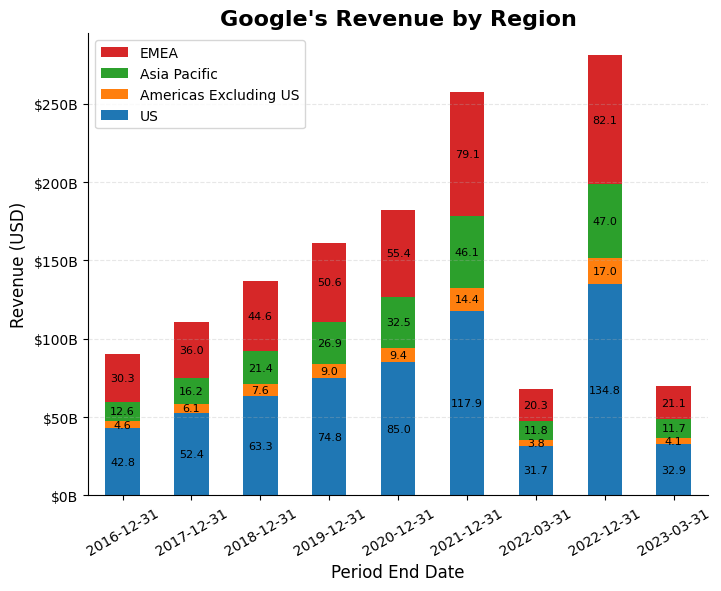

In [59]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# plot the histogram bar chart
ax = revenue_region_pivot.plot(kind='bar', stacked=True, figsize=(8, 6))

# rotate the x-axis labels by 0 degrees
plt.xticks(rotation=0)

# set the title and labels for the chart
ax.set_title("Google's Revenue by Region", fontsize=16, fontweight='bold')
ax.set_xlabel('Period End Date', fontsize=12)
ax.set_ylabel('Revenue (USD)', fontsize=12)

# set the legend properties
ax.legend(title='Product Category', loc='upper left', fontsize='small', title_fontsize=10)

# add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.3)

# remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# format y-axis ticks to show values in millions in dollars
formatter = ticker.FuncFormatter(lambda x, pos: '$%1.0fB' % (x*1e-9))
plt.gca().yaxis.set_major_formatter(formatter)

# map the original labels to new labels
label_map = {
    'country:US': 'US',
    'goog:AmericasExcludingUnitedStatesMember': 'Americas Excluding US',
    'srt:AsiaPacificMember': 'Asia Pacific',
    'us-gaap:EMEAMember': 'EMEA'
}

# create a list of new labels based on the original labels
new_labels = [label_map[label] for label in sorted(revenue_region['segment.value'].unique())]
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles=handles[::-1], labels=new_labels[::-1])

# add the values in billions of dollars to each part of the bar
for p in ax.containers:
    ax.bar_label(p, labels=['%.1f' % (v/1e9) for v in p.datavalues], 
                 label_type='center', fontsize=8)
    
# rotate the x-axis labels by 0 degrees
ax.tick_params(axis='x', labelrotation=30)
ax.tick_params(axis='x', labelrotation=30)

plt.show()


To facilitate a better understanding, we have provided a mapping between the human-readable labels and their corresponding XBRL element names, as the element names of the US GAAP items inside the XBRL data differ from the financial results table in the 10-K filing.


GoogleAdvertisingRevenueMember = 
    GoogleSearchOtherMember 
  + YouTubeAdvertisingRevenueMember 
  + GoogleNetworkMembersPropertiesMember OR GoogleNetworkMember 
An inconsistency in the naming convention can be observed as the revenue reported for Google Network was previously referred to as GoogleNetworkMembersPropertiesMember from 2016 to 2019, which changed to GoogleNetworkMember since 2020. To address this inconsistency, we will merge the values of both items and create a new consolidated item named GoogleNetwork.

In [48]:
all_revenues['value'] = all_revenues['value'].astype(int)

mask_1 = all_revenues['segment.dimension'] == 'srt:ProductOrServiceAxis'
mask_2 = all_revenues['segment.dimension'] == 'us-gaap:StatementBusinessSegmentsAxis'

revenue_product = all_revenues[mask_1 | mask_2]

revenue_product = revenue_product.drop_duplicates(subset=['period.endDate', 'segment.value'])

# pivot the dataframe to create a new dataframe with period.endDate as the index, 
# segment.value as the columns, and value as the values
revenue_product_pivot = revenue_product.pivot(index='period.endDate', columns='segment.value', values='value')


print("Google's revenues by product from 2016 to 2023")
print('-----------------------------------------------')
revenue_product_pivot

Google's revenues by product from 2016 to 2023
-----------------------------------------------


segment.value,goog:AdvertisingRevenueMember,goog:GoogleAdvertisingRevenueMember,goog:GoogleCloudMember,goog:GoogleInc.Member,goog:GoogleNetworkMember,goog:GoogleNetworkMembersPropertiesMember,goog:GooglePropertiesMember,goog:GoogleSearchOtherMember,goog:GoogleServicesMember,goog:OtherRevenuesMember,goog:YouTubeAdvertisingRevenueMember,us-gaap:AllOtherSegmentsMember
period.endDate,,,,,,,,,,,,
2016-12-31,7.938300e+10,NaN,NaN,7.938300e+10,NaN,1.559800e+10,6.378500e+10,NaN,NaN,1.060100e+10,NaN,2.880000e+08
2017-12-31,9.537500e+10,9.557700e+10,4.056000e+09,9.537500e+10,NaN,1.758700e+10,7.778800e+10,6.981100e+10,NaN,1.500300e+10,8.150000e+09,4.770000e+08
2018-12-31,1.163180e+11,1.164610e+11,5.838000e+09,1.163180e+11,NaN,1.998200e+10,9.633600e+10,8.529600e+10,NaN,1.990600e+10,1.115500e+10,5.950000e+08
2019-12-31,NaN,1.348110e+11,8.918000e+09,9.811500e+10,NaN,2.154700e+10,1.132640e+11,9.811500e+10,NaN,1.701400e+10,1.514900e+10,6.590000e+08
2020-12-31,NaN,1.469240e+11,1.305900e+10,NaN,2.309000e+10,NaN,NaN,1.040620e+11,1.040620e+11,2.171100e+10,1.977200e+10,6.570000e+08
2021-12-31,NaN,2.094970e+11,1.920600e+10,NaN,3.170100e+10,NaN,NaN,1.489510e+11,1.489510e+11,2.803200e+10,2.884500e+10,7.530000e+08
2022-03-31,NaN,5.466100e+10,5.821000e+09,NaN,8.174000e+09,NaN,NaN,3.961800e+10,3.961800e+10,6.811000e+09,6.869000e+09,4.400000e+08
2022-12-31,NaN,2.244730e+11,2.628000e+10,NaN,3.278000e+10,NaN,NaN,1.624500e+11,1.624500e+11,2.905500e+10,2.924300e+10,1.068000e+09
2023-03-31,NaN,5.454800e+10,7.454000e+09,NaN,7.496000e+09,NaN,NaN,4.035900e+10,4.035900e+10,7.413000e+09,6.693000e+09,2.880000e+08


In [49]:
# merge: goog:GoogleCloudMember + goog:GoogleNetworkMembersPropertiesMember
revenue_product_pivot['goog:GoogleNetwork'] = revenue_product_pivot['goog:GoogleNetworkMember'].fillna(revenue_product_pivot['goog:GoogleNetworkMembersPropertiesMember'])
revenue_product_pivot = revenue_product_pivot.drop(['goog:GoogleNetworkMember', 'goog:GoogleNetworkMembersPropertiesMember'], axis=1)

revenue_product_pivot = revenue_product_pivot[['goog:GoogleSearchOtherMember', 
                                               'goog:YouTubeAdvertisingRevenueMember', 
                                               'goog:GoogleNetwork', 
                                               'goog:GoogleCloudMember',
                                               'goog:OtherRevenuesMember']]

# remove 2016 row
revenue_product_pivot = revenue_product_pivot.iloc[1:]

revenue_product_pivot

segment.value,goog:GoogleSearchOtherMember,goog:YouTubeAdvertisingRevenueMember,goog:GoogleNetwork,goog:GoogleCloudMember,goog:OtherRevenuesMember
period.endDate,,,,,
2017-12-31,6.981100e+10,8.150000e+09,1.758700e+10,4.056000e+09,1.500300e+10
2018-12-31,8.529600e+10,1.115500e+10,1.998200e+10,5.838000e+09,1.990600e+10
2019-12-31,9.811500e+10,1.514900e+10,2.154700e+10,8.918000e+09,1.701400e+10
2020-12-31,1.040620e+11,1.977200e+10,2.309000e+10,1.305900e+10,2.171100e+10
2021-12-31,1.489510e+11,2.884500e+10,3.170100e+10,1.920600e+10,2.803200e+10
2022-03-31,3.961800e+10,6.869000e+09,8.174000e+09,5.821000e+09,6.811000e+09
2022-12-31,1.624500e+11,2.924300e+10,3.278000e+10,2.628000e+10,2.905500e+10
2023-03-31,4.035900e+10,6.693000e+09,7.496000e+09,7.454000e+09,7.413000e+09


In [50]:
sorted(list(revenue_product_pivot.columns.unique()))

['goog:GoogleCloudMember',
 'goog:GoogleNetwork',
 'goog:GoogleSearchOtherMember',
 'goog:OtherRevenuesMember',
 'goog:YouTubeAdvertisingRevenueMember']

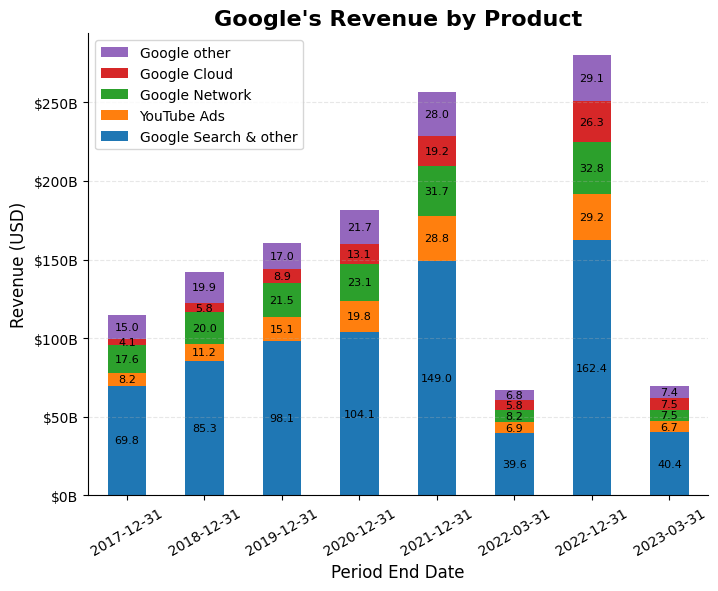

In [58]:
# plot the histogram bar chart
ax = revenue_product_pivot.plot(kind='bar', stacked=True, figsize=(8, 6))

# rotate the x-axis labels by 0 degrees
plt.xticks(rotation=0)

# set the title and labels for the chart
ax.set_title("Google's Revenue by Product", fontsize=16, fontweight='bold')
ax.set_xlabel('Period End Date', fontsize=12)
ax.set_ylabel('Revenue (USD)', fontsize=12)

# set the legend properties
ax.legend(title='Product Category', loc='upper left', fontsize='small', title_fontsize=10)

# add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.3)

# remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# format y-axis ticks to show values in millions in dollars
formatter = ticker.FuncFormatter(lambda x, pos: '$%1.0fB' % (x*1e-9))
plt.gca().yaxis.set_major_formatter(formatter)

# map the original labels to new labels
label_map = {
    'goog:GoogleCloudMember': 'Google Cloud',
    'goog:GoogleNetwork': 'Google Network',
    'goog:YouTubeAdvertisingRevenueMember': 'YouTube Ads',
    'goog:GoogleSearchOtherMember': 'Google Search & other',
    'goog:OtherRevenuesMember': 'Google other',
}

# create a list of new labels based on the original labels
new_labels = [label_map[label] for label in list(revenue_product_pivot.columns.unique())]
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles=handles[::-1], labels=new_labels[::-1])

# add the values in billions of dollars to each part of the bar
for p in ax.containers:
    ax.bar_label(p, labels=['%.1f' % (v/1e9) for v in p.datavalues], 
                 label_type='center', fontsize=8)
    
# rotate the x-axis labels by 0 degrees
ax.tick_params(axis='x', labelrotation=30)
ax.tick_params(axis='x', labelrotation=30)

plt.show()

Create a Figure with Two Revenue Charts: Region and Product
We will now combine both charts into a single figure, presenting them side by side. To ensure that the x-axis is aligned (i.e., the years from 2017 to 2022), we will remove the 2016 data points from revenue_region_pivot, since we don't have reliable data in revenue_product_pivot for that year.

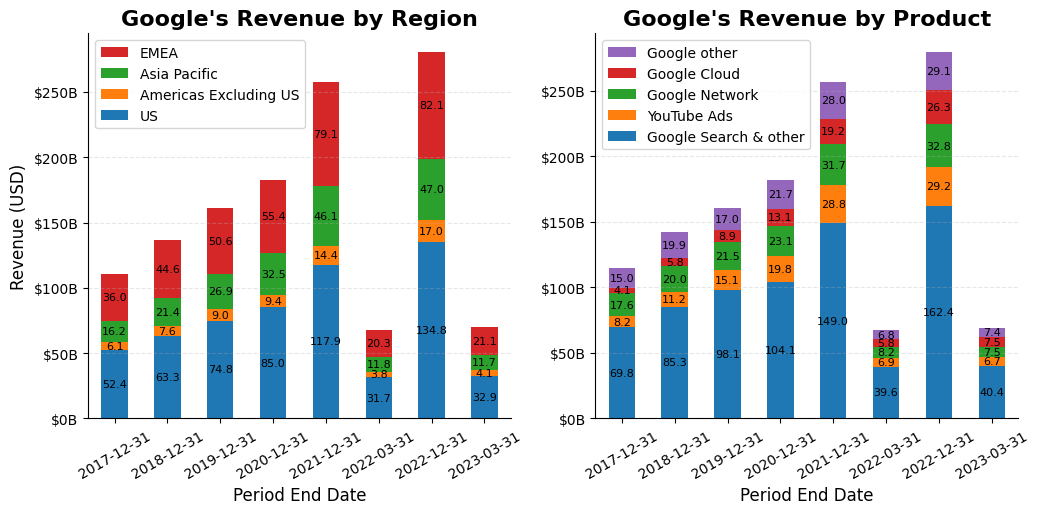

In [57]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

revenue_region_pivot.iloc[1:].plot(kind='bar', stacked=True, ax=ax1)
revenue_product_pivot.plot(kind='bar', stacked=True, ax=ax2)

# set the title and labels for the chart
ax1.set_title("Google's Revenue by Region", fontsize=16, fontweight='bold')
ax1.set_xlabel('Period End Date', fontsize=12)
ax1.set_ylabel('Revenue (USD)', fontsize=12)
ax2.set_title("Google's Revenue by Product", fontsize=16, fontweight='bold')
ax2.set_xlabel('Period End Date', fontsize=12)

# set the legend properties
ax1.legend(title='Region', loc='upper left', fontsize='small', title_fontsize=10)
ax2.legend(title='Product Category', loc='upper left', fontsize='small', title_fontsize=10)

# add gridlines
ax1.grid(axis='y', linestyle='--', alpha=0.3)
ax2.grid(axis='y', linestyle='--', alpha=0.3)

# remove the top and right spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# map the original labels to new labels
label_map_1 = {
    'country:US': 'US',
    'goog:AmericasExcludingUnitedStatesMember': 'Americas Excluding US',
    'srt:AsiaPacificMember': 'Asia Pacific',
    'us-gaap:EMEAMember': 'EMEA'
}
label_map_2 = {
    'goog:GoogleCloudMember': 'Google Cloud',
    'goog:GoogleNetwork': 'Google Network',
    'goog:YouTubeAdvertisingRevenueMember': 'YouTube Ads',
    'goog:GoogleSearchOtherMember': 'Google Search & other',
    'goog:OtherRevenuesMember': 'Google other',
}

# create a list of new labels based on the original labels
new_labels1 = [label_map_1[label] for label in list(revenue_region_pivot.columns.unique())]
new_labels2 = [label_map_2[label] for label in list(revenue_product_pivot.columns.unique())]
handles1, _ = ax1.get_legend_handles_labels()
handles2, _ = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1[::-1], labels=new_labels1[::-1])
ax2.legend(handles=handles2[::-1], labels=new_labels2[::-1])

# add the values in billions of dollars to each part of the bar
for p in ax1.containers:
    ax1.bar_label(p, labels=['%.1f' % (v/1e9) for v in p.datavalues], 
                 label_type='center', fontsize=8)

for p in ax2.containers:
    ax2.bar_label(p, labels=['%.1f' % (v/1e9) for v in p.datavalues], 
                 label_type='center', fontsize=8)

# format y-axis ticks to show values in millions in dollars
formatter = ticker.FuncFormatter(lambda x, pos: '$%1.0fB' % (x*1e-9))
ax1.yaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)

# rotate the x-axis labels by 0 degrees
ax1.tick_params(axis='x', labelrotation=30)
ax2.tick_params(axis='x', labelrotation=30)

plt.show()